# Trabajo Dimensionality Reduction

In [52]:
import pandas as pd
import numpy as np
import os
mainpath = "C:/Users/Camila Saenz/Downloads/TAREAS/Trabajo integrador final/"
filename = "covid utf.csv"
fullpath = os.path.join(mainpath, filename)
data = pd.read_csv(fullpath).drop(["Sector","Dep"],axis=1)
data.head(10)


,Impactado,Saldo,Desembolso_mes,Saldo Promedio,Deuda Sistea,Pasivo,Turismo,Sector de Impacto,Venta,Venta Formal,Pasivo_desembolso,Deuda rezagada va,Deuda rezagada vr,pasivo rezagada va,pasivo rezagada vr,Pasivo_desembolso da,Pasivo_desembolso dr
0,0,56643.10092,0.0,28321.55046,31365.73,5876.82,0,3,108400.0,43741.08,5876.82,-800.65,-0.024891,830.82,0.164649,830.82,0.164649
1,0,190313.99460,0.0,63437.99818,64864.99,4467.40,0,4,105300.0,69737.17,4467.40,-2810.52,-0.041529,-7043.43,-0.611896,-7043.43,-0.611896
2,0,547601.57360,0.0,182533.85790,200239.32,5000.92,0,1,86600.0,79178.83,5000.92,653.68,0.003275,2000.92,0.666973,2000.92,0.666973
3,0,283914.20840,0.0,94638.06947,112945.17,325.50,0,3,103000.0,0.00,325.50,14820.77,0.151041,-17128.30,-0.981351,-17128.30,-0.981351
4,0,142296.43840,0.0,47432.14612,144877.21,0.00,0,4,172920.0,171999.33,0.00,17468.60,0.137107,-2071.80,-1.000000,-2071.80,-1.000000
5,0,456005.09530,0.0,152001.69840,136066.81,0.07,0,1,188660.0,0.00,0.07,-6302.57,-0.044269,0.00,0.000000,0.00,0.000000
6,0,76984.28362,0.0,25661.42787,66740.43,7650.64,0,1,22055.0,5000.00,7650.64,-5973.05,-0.082145,248.61,0.033587,248.61,0.033587
7,0,235218.90890,0.0,78406.30297,75528.86,116242.11,0,3,97400.0,5977.67,116242.11,1442.01,0.019464,-96110.34,-0.452598,-96110.34,-0.452598
8,0,531200.54440,0.0,177066.84810,177393.15,0.00,0,4,441000.0,32673.33,0.00,-73855.46,-0.293954,-55000.00,-1.000000,-55000.00,-1.000000
9,0,138737.75300,0.0,46245.91766,47034.40,688.55,0,3,105000.0,0.00,688.55,-2250.13,-0.045656,-81172.46,-0.991589,-81172.46,-0.991589


In [53]:
data.describe()
desc=data.describe()
X = data.iloc[:,0:9]
Y = data.iloc[:,9]

In [55]:
Y

0        43741.08
1        69737.17
2        79178.83
3            0.00
4       171999.33
          ...    
1993      4905.00
1994      7034.00
1995     93482.00
1996      8333.00
1997      4171.00
Name: Venta Formal, Length: 1998, dtype: float64

In [54]:
X

,Impactado,Saldo,Desembolso_mes,Saldo Promedio,Deuda Sistea,Pasivo,Turismo,Sector de Impacto,Venta
0,0,56643.10092,0.0,28321.550460,31365.73,5876.82,0,3,108400.0
1,0,190313.99460,0.0,63437.998180,64864.99,4467.40,0,4,105300.0
2,0,547601.57360,0.0,182533.857900,200239.32,5000.92,0,1,86600.0
3,0,283914.20840,0.0,94638.069470,112945.17,325.50,0,3,103000.0
4,0,142296.43840,0.0,47432.146120,144877.21,0.00,0,4,172920.0
...,...,...,...,...,...,...,...,...,...
1993,1,4325.85076,0.0,1441.950253,1624.47,2558.31,0,4,30000.0
1994,1,94650.62631,0.0,31550.208770,75502.84,3029.48,0,4,32100.0
1995,1,747579.33510,0.0,249193.111700,843972.49,593.99,0,3,180905.0
1996,1,18077.98187,0.0,6025.993957,122633.10,5312.64,0,3,69500.0


In [57]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

sc=StandardScaler()
X_std=sc.fit_transform(X)
pca=PCA(n_components=9)
X_std_pca=pca.fit_transform(X_std)

var_exp = pca.explained_variance_ratio_
cum_var_exp = np.cumsum(var_exp)
cum_var_exp

array([0.34246575, 0.50138573, 0.62195542, 0.7328908 , 0.82994886,
       0.91789148, 0.97454077, 0.99989158, 1.        ])

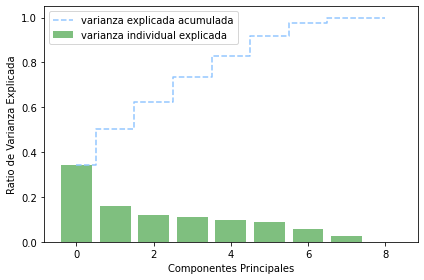

In [59]:
with plt.style.context('seaborn-pastel'):
    plt.figure(figsize=(6,4))
    
    plt.bar(range(9), var_exp, alpha=0.5, align='center', label='varianza individual explicada', color='g')
    plt.step(range(9), cum_var_exp, where='mid', linestyle='--', label='varianza explicada acumulada')
    plt.ylabel('Ratio de Varianza Explicada')
    plt.xlabel('Componentes Principales')
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()

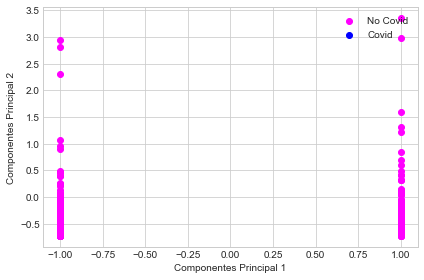

In [60]:
labl={0:'No Covid',1:'Covid'}
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6,4))
    for lab, col in zip((0,1), ('magenta','blue')):
        plt.scatter(X_std[Y==lab, 0], X_std[Y==lab, 1], label=labl[lab], c=col) 
    plt.xlabel('Componentes Principal 1')
    plt.ylabel('Componentes Principal 2')
    plt.legend(loc='upper right')
    plt.tight_layout()
    plt.show()

De acuerdo a la grafica se concluye que los componentes principales 1 discriminan la variable objetivo de acuerdo a los componentes principales 2